In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
# Đường dẫn đến thư mục chứa dataset
dataset_dir = '/content/drive/MyDrive/img_num'

# Các tham số huấn luyện
batch_size = 32
img_height = 140
img_width = 90
epochs = 20

In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 3883 images belonging to 10 classes.
Found 965 images belonging to 10 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)

Epoch 1/20
121/121 [==============================] - 1176s 10s/step - loss: 2.0074 - accuracy: 0.2903 - val_loss: 1.4454 - val_accuracy: 0.5625
Epoch 2/20
121/121 [==============================] - 106s 874ms/step - loss: 0.9619 - accuracy: 0.6957 - val_loss: 0.8674 - val_accuracy: 0.7302
Epoch 3/20
121/121 [==============================] - 106s 873ms/step - loss: 0.5580 - accuracy: 0.8268 - val_loss: 0.6715 - val_accuracy: 0.7802
Epoch 4/20
121/121 [==============================] - 104s 861ms/step - loss: 0.3842 - accuracy: 0.8751 - val_loss: 0.5904 - val_accuracy: 0.8271
Epoch 5/20
121/121 [==============================] - 103s 850ms/step - loss: 0.2901 - accuracy: 0.9055 - val_loss: 0.5124 - val_accuracy: 0.8385
Epoch 6/20
121/121 [==============================] - 104s 859ms/step - loss: 0.2139 - accuracy: 0.9276 - val_loss: 0.5139 - val_accuracy: 0.8542
Epoch 7/20
121/121 [==============================] - 106s 876ms/step - loss: 0.1677 - accuracy: 0.9468 - val_loss: 0.5747 - 

In [ ]:
model.save('/content/drive/MyDrive/HDTQS_Project/digit_recognition_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Tổng mất mát trên tập validation: {loss}')
print(f'Độ chính xác trên tập validation: {accuracy}')

31/31 [==============================] - 9s 299ms/step - loss: 0.6780 - accuracy: 0.8518
Tổng mất mát trên tập validation: 0.6779572367668152
Độ chính xác trên tập validation: 0.8518134951591492


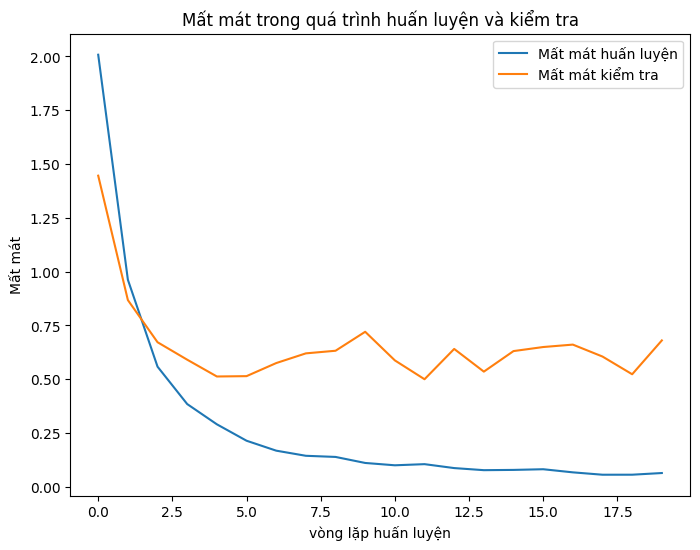

In [ ]:
import matplotlib.pyplot as plt

# Tạo một figure mới với kích thước cụ thể (chiều rộng=8 inches, chiều cao=6 inches)
plt.figure(figsize=(8, 6))

# Vẽ đường biểu diễn mất mát trong quá trình huấn luyện, đặt nhãn là 'Training Loss'
plt.plot(history.history['loss'], label='Mất mát huấn luyện')

# Vẽ đường biểu diễn mất mát trong quá trình kiểm tra, đặt nhãn là 'Validation Loss'
plt.plot(history.history['val_loss'], label='Mất mát kiểm tra')

# Đặt nhãn trục x là 'Epochs' (số vòng lặp huấn luyện)
plt.xlabel('vòng lặp huấn luyện')

# Đặt nhãn trục y là 'Mất mát'
plt.ylabel('Mất mát')

# Đặt tiêu đề của biểu đồ là 'Mất mát trong quá trình huấn luyện và kiểm tra'
plt.title('Mất mát trong quá trình huấn luyện và kiểm tra')

# Thêm chú thích vào biểu đồ dựa trên nhãn được cung cấp trong plt.plot()
plt.legend()

# Hiển thị biểu đồ
plt.show()



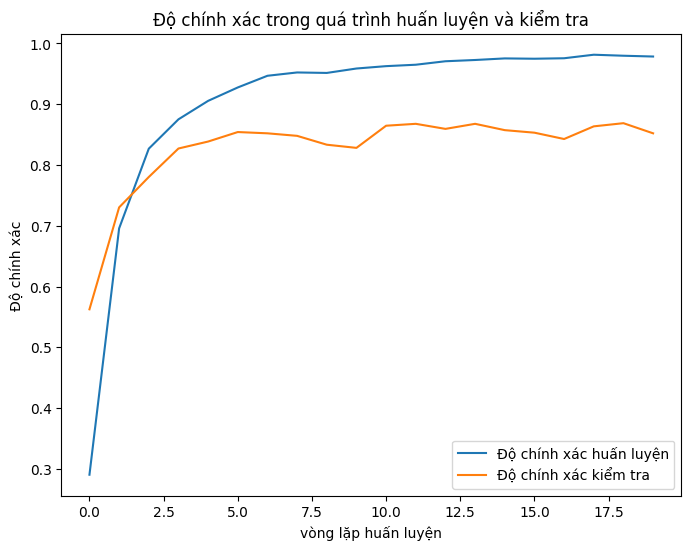

In [ ]:
import matplotlib.pyplot as plt

# Tạo một figure mới với kích thước cụ thể (chiều rộng=8 inches, chiều cao=6 inches)
plt.figure(figsize=(8, 6))

# Vẽ đường biểu diễn accuracy trong quá trình huấn luyện, đặt nhãn là 'Training Accuracy'
plt.plot(history.history['accuracy'], label='Độ chính xác huấn luyện')

# Vẽ đường biểu diễn accuracy trong quá trình kiểm tra, đặt nhãn là 'Validation Accuracy'
plt.plot(history.history['val_accuracy'], label='Độ chính xác kiểm tra')

# Đặt nhãn trục x là 'Epochs' (số vòng lặp huấn luyện)
plt.xlabel('vòng lặp huấn luyện')

# Đặt nhãn trục y là 'Độ chính xác'
plt.ylabel('Độ chính xác')

# Đặt tiêu đề của biểu đồ là 'Độ chính xác trong quá trình huấn luyện và kiểm tra'
plt.title('Độ chính xác trong quá trình huấn luyện và kiểm tra')

# Thêm chú thích vào biểu đồ dựa trên nhãn được cung cấp trong plt.plot()
plt.legend()

# Hiển thị biểu đồ
plt.show()


In [ ]:
import tensorflow as tf
from google.colab import files
import numpy as np
from tensorflow.keras.preprocessing import image

# 1. Tải mô hình đã huấn luyện
model = tf.keras.models.load_model('/content/drive/MyDrive/HDTQS_Project/digit_recognition_model.h5')

# 2. Tải ảnh từ máy tính lên Google Colab
uploaded = files.upload()

# Giả sử bạn chỉ tải lên một ảnh
img_path = list(uploaded.keys())[0]

# 3. Tiền xử lý ảnh
img_height = 140
img_width = 90

img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Rescale ảnh tương tự như trong quá trình huấn luyện

# 4. Dự đoán nhãn cho ảnh
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])
print(f'Dự đoán: {predicted_class}')

Saving 721.png to 721 (1).png
1/1 [==============================] - 0s 92ms/step
Dự đoán: 7


Saving 932.png to 932 (1).png


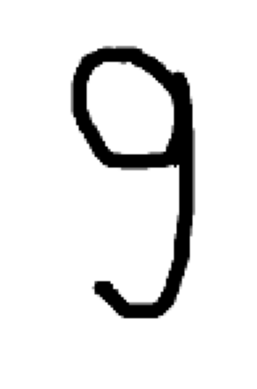

1/1 [==============================] - 0s 26ms/step
Dự đoán: 9


In [ ]:
import tensorflow as tf
from google.colab import files
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt  # Import thư viện matplotlib

# 1. Tải mô hình đã huấn luyện
#model = tf.keras.models.load_model('digit_recognition_model.h5')

# 2. Tải ảnh từ máy tính lên Google Colab
uploaded = files.upload()

# Giả sử bạn chỉ tải lên một ảnh
img_path = list(uploaded.keys())[0]

# 3. Tiền xử lý ảnh
img_height = 140
img_width = 90

img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Rescale ảnh tương tự như trong quá trình huấn luyện

# Hiển thị ảnh đã tải lên
plt.imshow(img)  # Hiển thị ảnh
plt.axis('off')   # Tắt trục số
plt.show()

# 4. Dự đoán nhãn cho ảnh
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])
print(f'Dự đoán: {predicted_class}')
